In [13]:
#Importing necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# About the Dataset

This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to present, minus the most recent days.

In [2]:
#reading the csv file
df=pd.read_csv("Chicago_crimes_2001_to_Present.csv")

In [3]:
df.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09-05-2015 13:30,043XX S WOOD ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02-10-2018 15:50,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09-04-2015 11:30,008XX N CENTRAL AVE,870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,6,1138875.0,1904869.0,2015,02-10-2018 15:50,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09-01-2018 00:01,082XX S INGLESIDE AVE,810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,6,NaN,NaN,2018,04-06-2019 16:04,NaN,NaN,NaN
3,10224740,HY411595,09-05-2015 12:45,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02-10-2018 15:50,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09-05-2015 13:00,0000X N LARAMIE AVE,560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02-10-2018 15:50,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [4]:
#checking the dimension(no.of rows, no. of coloums)
df.shape

(1048575, 22)

In [10]:
#Checking the datatypes of each features
df.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [11]:
# checking the number of null values present in a particular column
df.isnull().sum()

ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     3122
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                    26402
Community Area          26290
FBI Code                    0
X Coordinate             5128
Y Coordinate             5128
Year                        0
Updated On                  0
Latitude                 5128
Longitude                5128
Location                 5128
dtype: int64

In [13]:
# For seeing some basic statistical details like percentile, mean, std etc
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1.048575e+06,1.048575e+06,1.048574e+06,1.022173e+06,1.022285e+06,1.043447e+06,1.043447e+06,1.048575e+06,1.043447e+06,1.043447e+06
mean,1.071631e+07,1.145116e+03,1.120272e+01,2.318499e+01,3.677815e+01,1.164802e+06,1.886402e+06,2.016529e+03,4.184388e+01,-8.767074e+01
std,1.582845e+06,6.956213e+02,6.945138e+00,1.400848e+01,2.138818e+01,1.626197e+04,3.126526e+04,2.790685e+00,8.598640e-02,5.917264e-02
min,1.007000e+03,1.110000e+02,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,1.054128e+07,6.120000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.153083e+06,1.859329e+06,2.016000e+03,4.176936e+01,-8.771326e+01
50%,1.096387e+07,1.031000e+03,1.000000e+01,2.400000e+01,3.200000e+01,1.166563e+06,1.893574e+06,2.017000e+03,4.186375e+01,-8.766429e+01
75%,1.133595e+07,1.713000e+03,1.700000e+01,3.400000e+01,5.400000e+01,1.176438e+06,1.908825e+06,2.018000e+03,4.190556e+01,-8.762786e+01
max,1.224939e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951535e+06,2.020000e+03,4.202267e+01,-8.752453e+01


In [5]:
# for printing the unique values present in the Primary Type in sorted order
df["Primary Type"].sort_values().unique()

array(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'GAMBLING', 'HOMICIDE', 'HUMAN TRAFFICKING',
       'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING',
       'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS',
       'NON - CRIMINAL', 'NON-CRIMINAL',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OBSCENITY',
       'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY', 'SEX OFFENSE',
       'STALKING', 'THEFT', 'WEAPONS VIOLATION'], dtype=object)

In [15]:
# dropping the rows which contain NaN values
df=df.dropna()

In [16]:
#Cross checking if there be any null values remains in a column
df.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [8]:
# convert dates to pandas datetime format
df.Date = pd.to_datetime(df.Date, format='%m/%d/%Y %I:%M:%S %p')

# setting the index to be the date will help us a lot later on
df.index = pd.DatetimeIndex(df.Date)
df.head()

ValueError: time data '09-05-2015 13:30' does not match format '%m/%d/%Y %I:%M:%S %p' (match)

In [19]:
# Storing a subset of df in a new variable df_s
df_s=df.iloc[0:100000]

In [20]:
# checking the dimension (number of rows, number of coumns)
df_s.shape

(100000, 22)

In [9]:
# Created a scatter plot of X and Y coordinates vs all crime data available in the dataset

import seaborn as sns

sns.FacetGrid(df_s,hue='District',size=17).map(plt.scatter,'X Coordinate','Y Coordinate').add_legend()
plt.title("All Crime Distribution per District",fontsize=20)

plt.show()

NameError: name 'df_s' is not defined

In [14]:
import get_resampler
plt.figure(figsize=(20,15))
df.resample('Y').size().plot(legend=False)
plt.title('Number of crimes per Year (2001 - 2022)',fontsize=20)
plt.xlabel('Years',fontsize=20)
plt.ylabel('Number of crimes',fontsize=20)
plt.show()

ModuleNotFoundError: No module named 'get_resampler'

In [15]:
import get_resampler
plt.figure(figsize=(20,15))
df.resample('M').size().plot(legend=False)
plt.title('Number of crimes per Month (2001 - 2022)',fontsize=20)
plt.xlabel('Months',fontsize=20)
plt.ylabel('Number of crimes',fontsize=20)
plt.show()

ModuleNotFoundError: No module named 'get_resampler'

In [16]:
import get_resampler
plt.figure(figsize=(20,15))
df.resample('W').size().plot(legend=False)
plt.title('Number of crimes per Week (2001 - 2022)',fontsize=20)
plt.xlabel('Weeks',fontsize=20)
plt.ylabel('Number of crimes',fontsize=20)
plt.show()

ModuleNotFoundError: No module named 'get_resampler'

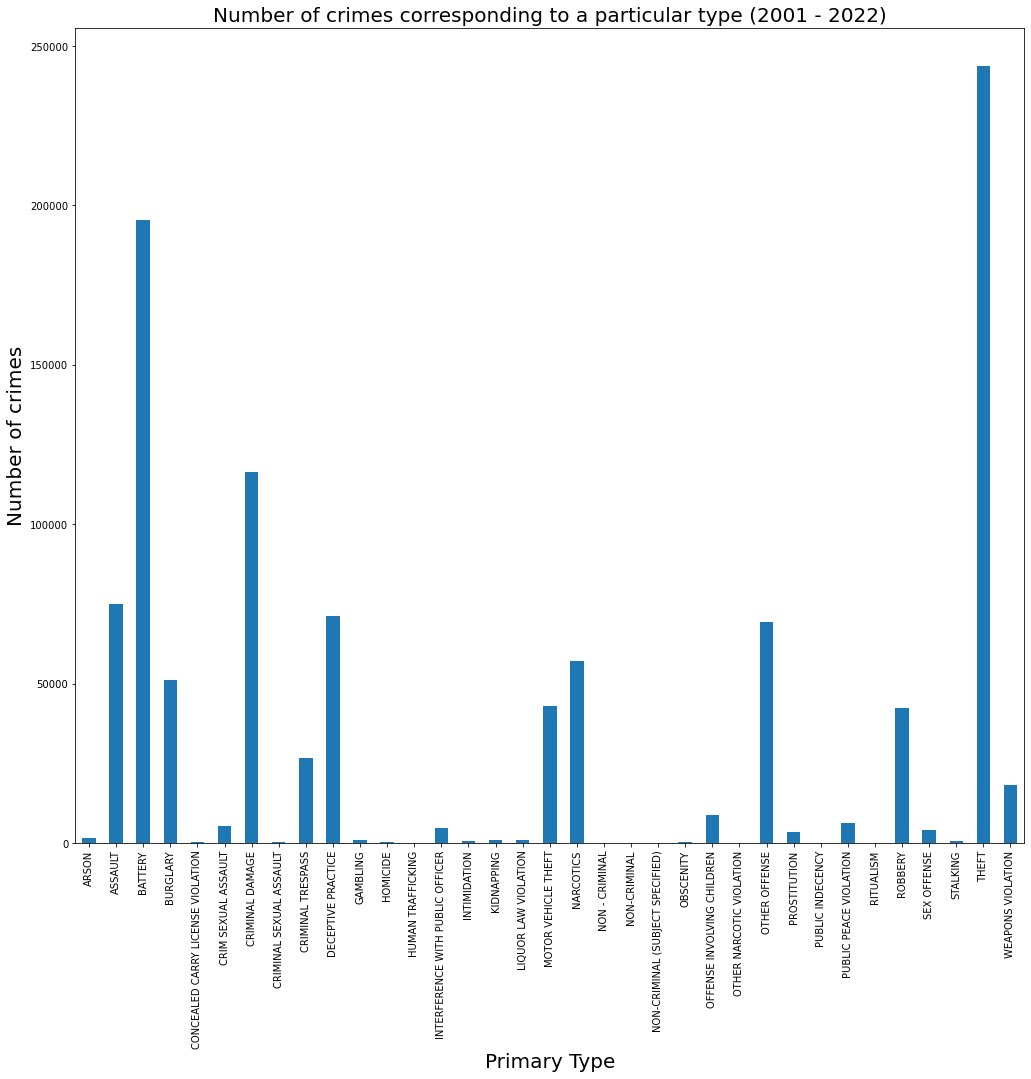

In [17]:
plt.figure(figsize=(17,15))
df.groupby("Primary Type").size().plot(kind="bar")
plt.title('Number of crimes corresponding to a particular type (2001 - 2022)',fontsize=20)
plt.xlabel('Primary Type',fontsize=20)
plt.ylabel('Number of crimes',fontsize=20)
plt.show()

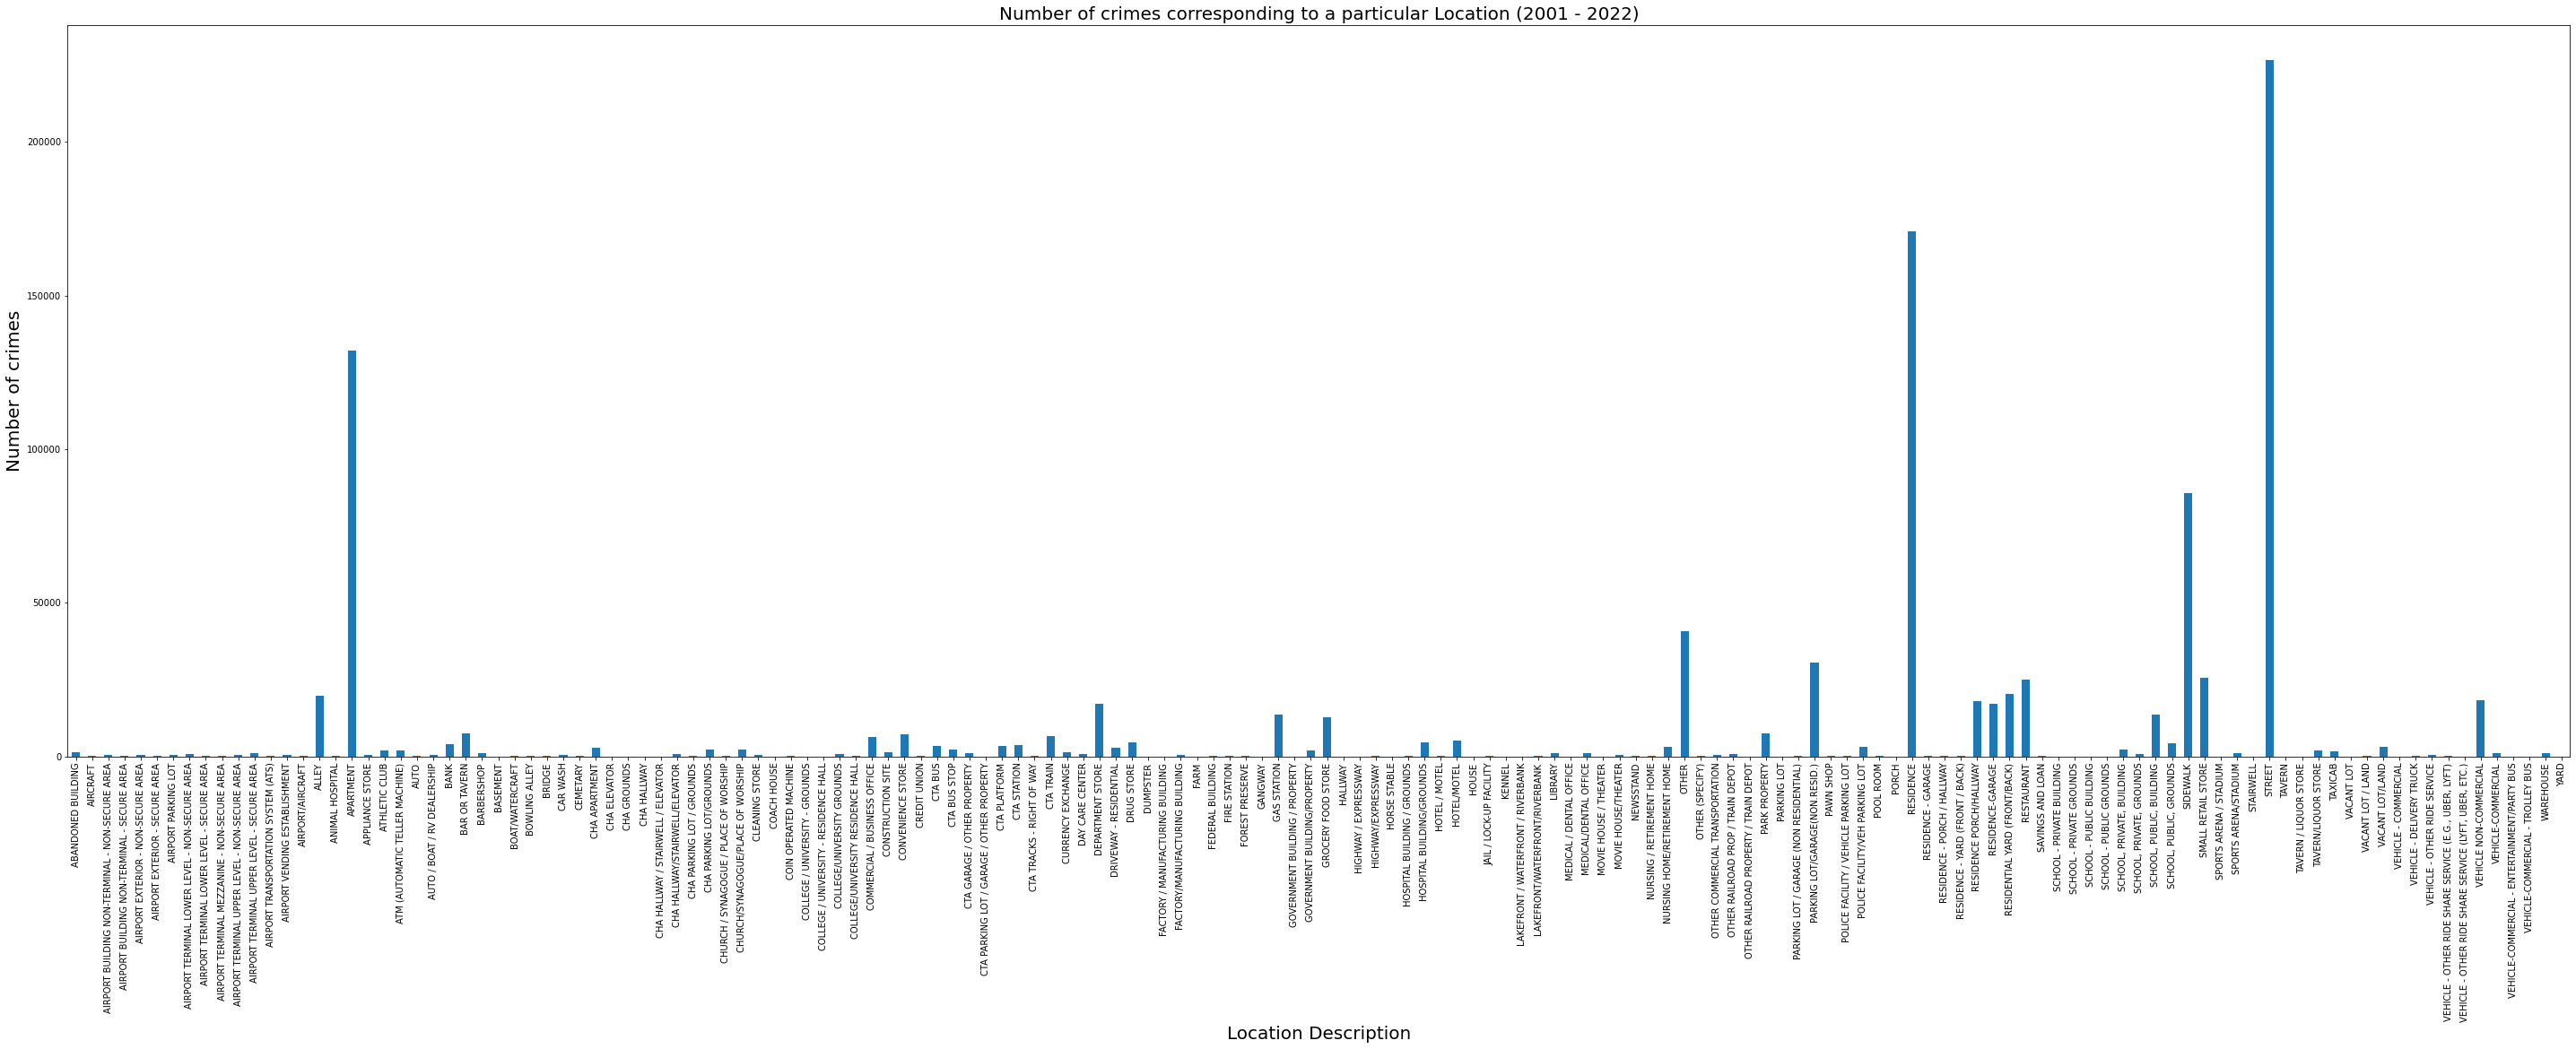

In [28]:
plt.figure(figsize=(50,15))
df.groupby("Location Description").size().plot(kind="bar")
plt.title('Number of crimes corresponding to a particular Location (2001 - 2022)',fontsize=20)
plt.xlabel('Location Description',fontsize=20)
plt.ylabel('Number of crimes',fontsize=20)
plt.show()

C:\Users\Anusha- TechTrunk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


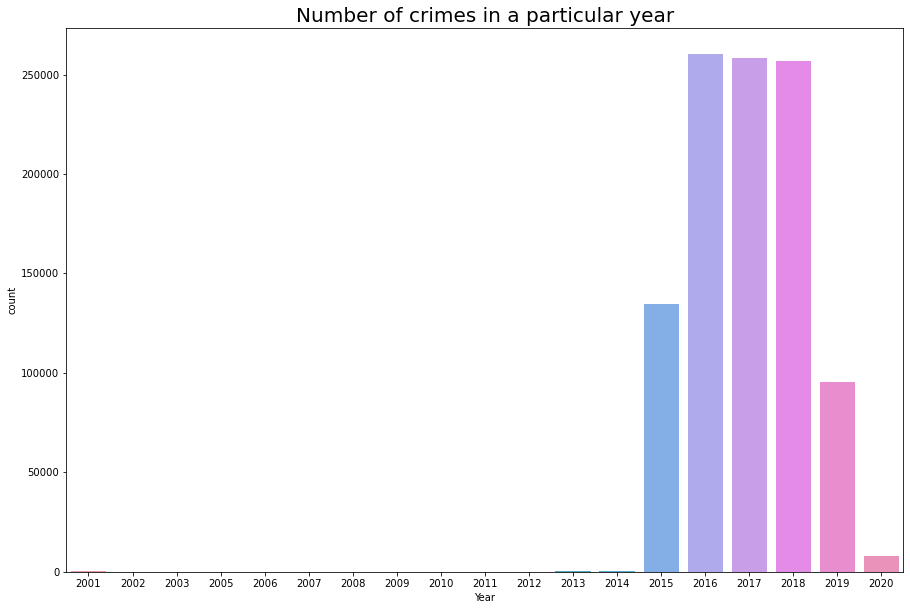

In [32]:
plt.figure(figsize=(15,10))
sns.countplot(df["Year"])
plt.title("Number of crimes in a particular year", fontsize=20)
plt.show()

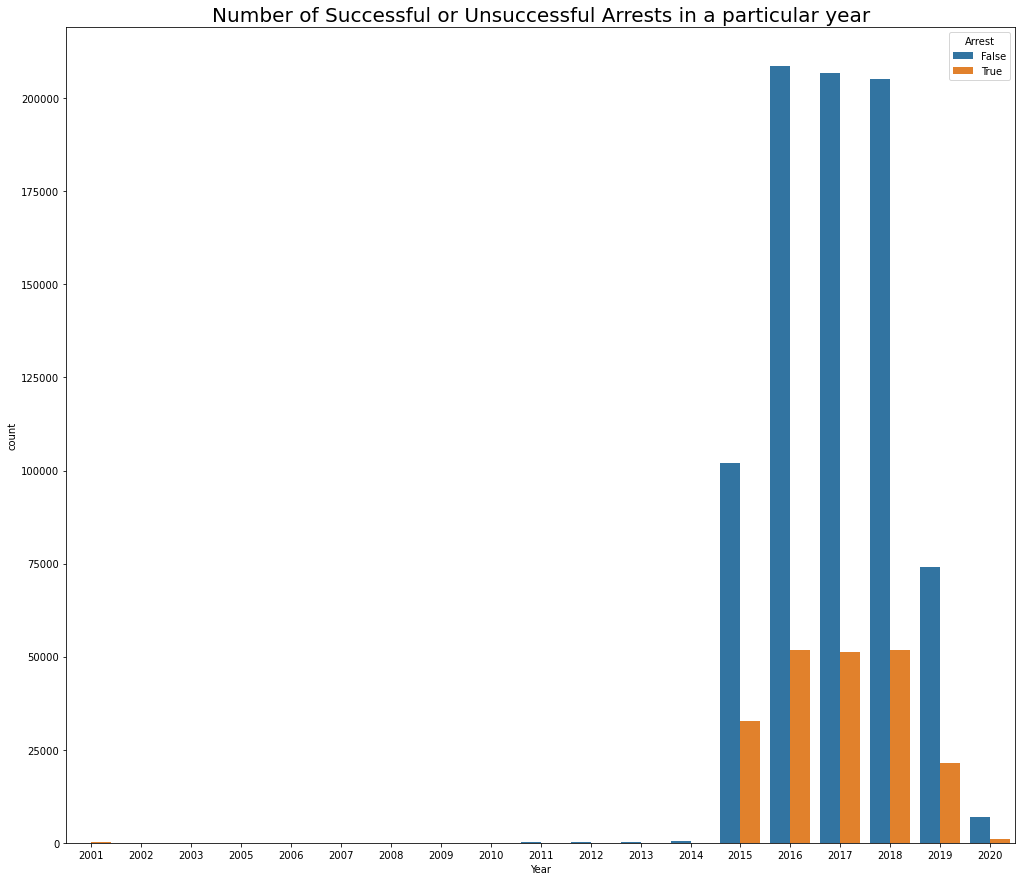

In [33]:
plt.figure(figsize=(17,15))
sns.countplot(x="Year",hue="Arrest",data=df)
plt.title("Number of Successful or Unsuccessful Arrests in a particular year", fontsize=20)
plt.show()

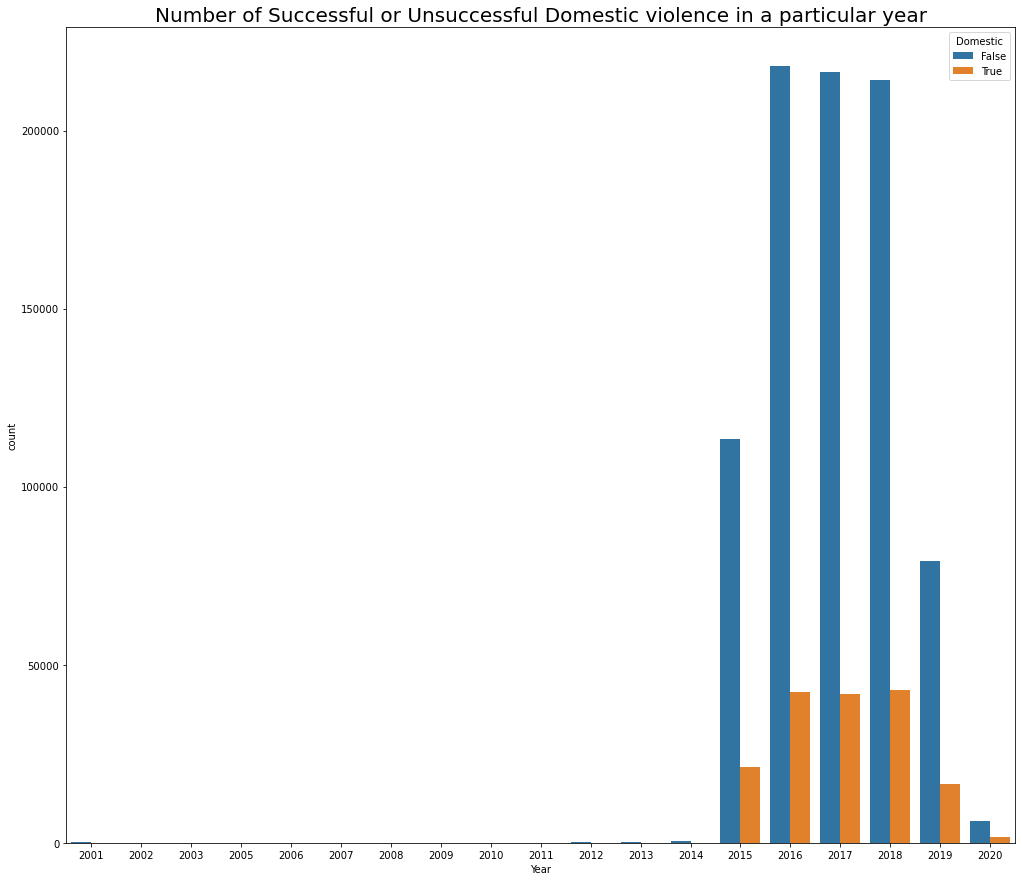

In [35]:
plt.figure(figsize=(17,15))
sns.countplot(x="Year",hue="Domestic",data=df)
plt.title("Number of Successful or Unsuccessful Domestic violence in a particular year", fontsize=20)
plt.show()

AttributeError: 'Int64Index' object has no attribute 'year'

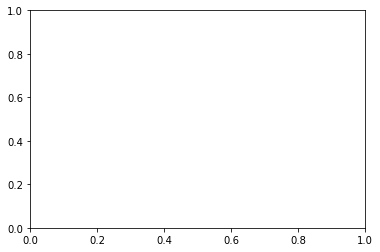

In [36]:
l=df["Arrest"][df["Arrest"]==True]
plt.subplot()

# yearly arrest
l.groupby(l.index.year).count().plot(figsize=(15,15))
plt.title('Yearly arrests', fontsize=20)
plt.show()

# Monthly arrest
l.groupby(l.index.month).count().plot(figsize=(15,15))
plt.title('Monthly arrests', fontsize=20)
plt.show()

# Weekly arrest
l.groupby(l.index.week).count().plot(figsize=(15,15))
plt.title('Weekly arrests', fontsize=20)
plt.show()

# daily arrest
l.groupby(l.index.day).count().plot(figsize=(15,15))
plt.title('Daily arrests', fontsize=20)
plt.show()

plt.show()

AttributeError: 'Int64Index' object has no attribute 'year'

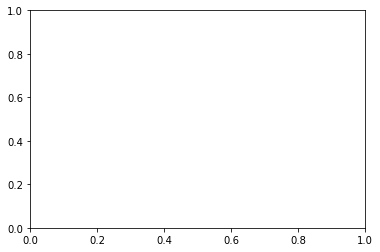

In [37]:
l=df["Domestic"][df["Domestic"]==True]
plt.subplot()

# yearly domestic violence
l.groupby(l.index.year).count().plot(figsize=(15,15))
plt.title('Yearly domestic violence', fontsize=20)
plt.show()

# Monthly domestic violence
l.groupby(l.index.month).count().plot(figsize=(15,15))
plt.title('Monthly domestic violence', fontsize=20)
plt.show()

# Weekly domestic violence
l.groupby(l.index.week).count().plot(figsize=(15,15))
plt.title('Weekly domestic violence', fontsize=20)
plt.show()

# daily domestic violence
l.groupby(l.index.day).count().plot(figsize=(15,15))
plt.title('Daily domestic violence', fontsize=20)
plt.show()

plt.show()